# Linear Regression For E-Commerce

This project uses hypotethetical data for an ecommerce company that specializes in clothing and style advice sessions. After the advisory sessions, customers would go home and use either the website or mobile app to makes purchases.

The goal of this project is to determine where focus should be prioritized, the website or the mobile app. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

About the Data

Dataset contains customer Email, Address, and Avatar. The data that is relevant for the linear regression is below.

Average session of style advice sessions.
Time spent on app in minutes
Time spent on website in minutes
Length of membership time in years

In [2]:
customers = pd.read_csv('customer-usage.csv')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,835 Frank Tunnel,NaN,NaN,NaN,NaN,NaN,NaN
1,Wrightmouth,"MI 82180-9605""",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
2,hduke@hotmail.com,4547 Archer Common,NaN,NaN,NaN,NaN,NaN,NaN
3,Diazchester,"CA 06566-8576""",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
4,pallen@yahoo.com,24645 Valerie Unions Suite 582,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,454.000000
mean,31.130462,14.350284,33.956926,48.607305,499.919858
std,6.128380,7.327838,9.787361,144.216919,78.325793
min,8.668350,8.508152,0.789520,0.269901,266.086341
25%,32.086022,11.469670,36.088966,3.014640,445.917049
50%,32.904773,12.109744,36.943004,3.653135,498.887875
75%,33.636921,12.992473,37.648456,4.534414,549.100737
max,36.139662,39.220713,40.005182,744.221867,765.518462


### Exploration

Visualizations will be used to get an idea of the relationship between yearly amount spent by the customer and the time spent on the website.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


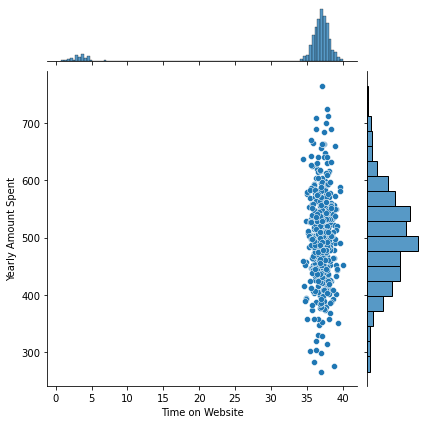

In [4]:
sns.jointplot(customers['Time on Website'],customers['Yearly Amount Spent'])

Visualization of the relationship between yearly amount spent by the customer and the time spent on the mobile app.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


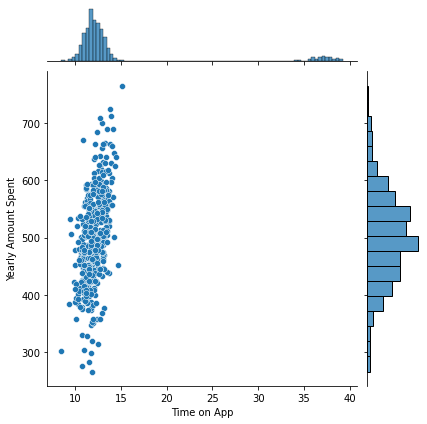

In [5]:
sns.jointplot(customers['Time on App'],customers['Yearly Amount Spent'])

It appears that the correlation between time spent on and the mobile app and the yearly spend is less than the website and yearly spend. Now to check the relationship between time on the app and the website.

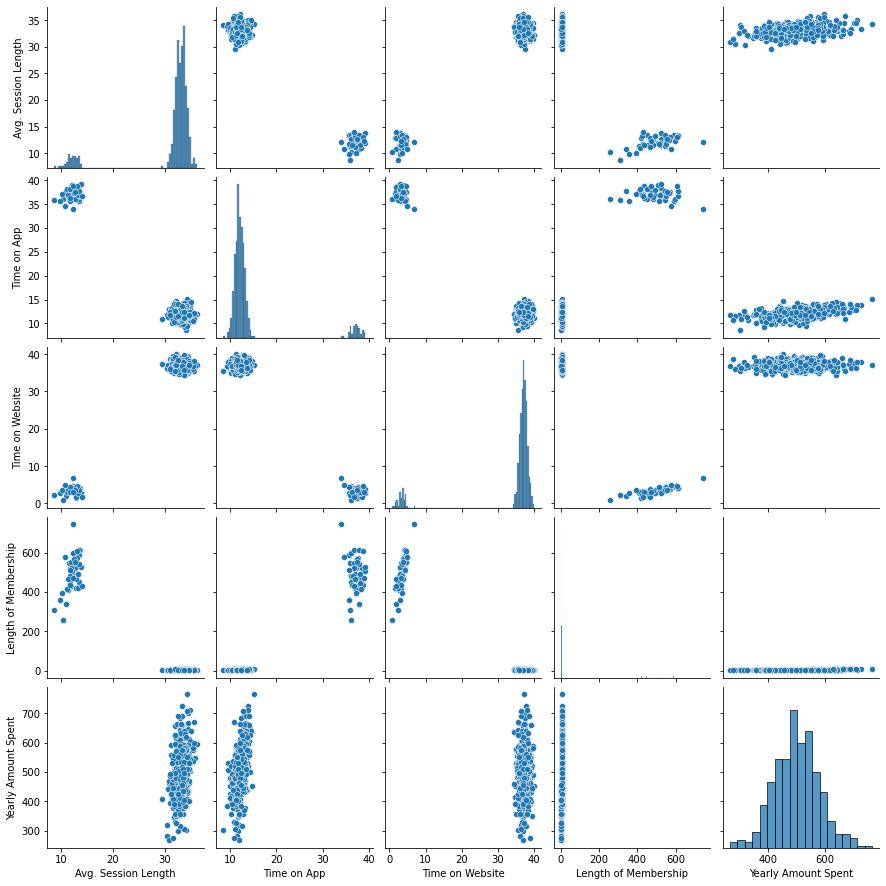

In [6]:
sns.pairplot(customers)

In [7]:
customers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.976855,0.980792,-0.963908,0.342522
Time on App,-0.976855,1.000000,-0.985412,0.972431,0.500014
Time on Website,0.980792,-0.985412,1.000000,-0.972252,0.013748
Length of Membership,-0.963908,0.972431,-0.972252,1.000000,0.804974
Yearly Amount Spent,0.342522,0.500014,0.013748,0.804974,1.000000


Yearly spend is most highly correlated with the length of membership. Loyal customers spend more money so this is not unusual.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


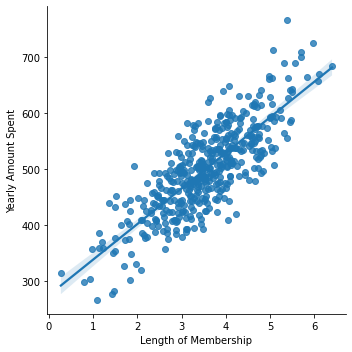

In [8]:
# Linear plot of membership length and yearly spend
sns.lmplot('Length of Membership','Yearly Amount Spent',data=customers)

### Preparing Data for Modeling

In [9]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [10]:
#Select only numerical features for training
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [12]:
# split the data into a training and testing set using 70/30 ratio
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.3,random_state=101)

### Model Training

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Testing Predictions

In [14]:
predictions = lm.predict(X_test)
# scatterplot of the real vs predicted values
plt.scatter(y_test,predictions)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

The model performs well since the predictions seem to be linearly close to the real values.

### Evaluating the Results

In [ ]:
# Residual sum
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))